In [ ]:
###
#
# This program demonstrates using the keras library to explore deep learning. This code is orinally authored by Joseph Lee Wei En, retrieved
# from the site https://medium.com/intuitive-deep-learning/build-your-first-neural-network-to-predict-house-prices-with-keras-eb5db60232c. 
# Only minor changes were made to the original code.
#
# Author: Anushri Kartik-Narayan
# Assignment: Homework 11
# Part: Exercise 3.a
# Class: CIS2532-NET02
# Professor: Sheikh Shamsuddin
# Submitted 12/04/2020
#
###

In [25]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [6]:
X = dataset[:, 0:10]
Y = dataset[:, 10] 

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [12]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [15]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [16]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [17]:
hist = model.fit(X_train, Y_train,
         batch_size=32, epochs=100,
         validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 8ms/step - loss: 0.7196 - accuracy: 0.4883 - val_loss: 0.7013 - val_accuracy: 0.5616
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7105 - accuracy: 0.4873 - val_loss: 0.6983 - val_accuracy: 0.5616
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.4687 - val_loss: 0.6960 - val_accuracy: 0.5434
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6996 - accuracy: 0.4432 - val_loss: 0.6937 - val_accuracy: 0.4612
Epoch 5/100
32/32 [==============================] - 0s 11ms/step - loss: 0.6953 - accuracy: 0.4550 - val_loss: 0.6917 - val_accuracy: 0.5023
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5450 - val_loss: 0.6896 - val_accuracy: 0.5662
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.6223 - val_loss: 0.6874 - val_accuracy: 0.5890
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8738 - val_loss: 0.3777 - val_accuracy: 0.8539
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8728 - val_loss: 0.3752 - val_accuracy: 0.8584
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8757 - val_loss: 0.3738 - val_accuracy: 0.8539
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8757 - val_loss: 0.3712 - val_accuracy: 0.8539
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.8757 - val_loss: 0.3684 - val_accuracy: 0.8584
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8757 - val_loss: 0.3683 - val_accuracy: 0.8584
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8787 - val_loss: 0.3645 - val_accuracy: 0.8584
Epoch 

In [18]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.2992 - accuracy: 0.8584


0.8584474921226501

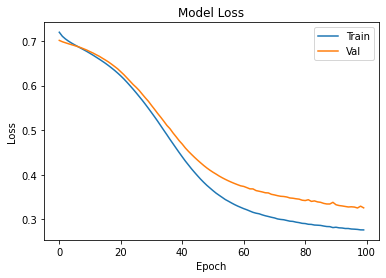

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

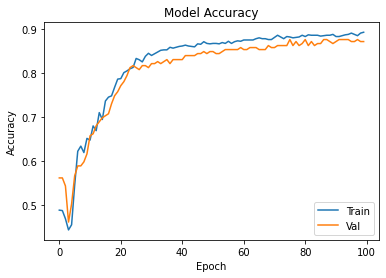

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [22]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [23]:
model_2.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [24]:
hist_2 = model_2.fit(X_train, Y_train,
                     batch_size=32, epochs=100,
                     validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4331 - accuracy: 0.8082 - val_loss: 0.4832 - val_accuracy: 0.7763
Epoch 2/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3485 - accuracy: 0.8659 - val_loss: 0.3638 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2921 - accuracy: 0.8836 - val_loss: 0.3413 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 2s 47ms/step - loss: 0.2901 - accuracy: 0.8826 - val_loss: 0.3145 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2654 - accuracy: 0.8875 - val_loss: 0.2933 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2724 - accuracy: 0.8845 - val_loss: 0.2900 - val_accuracy: 0.9041
Epoch 7/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2477 - accuracy: 0.8973 - val_loss: 0.2890 - val_accuracy: 0.8767
Epoch 

32/32 [==============================] - 1s 32ms/step - loss: 0.1465 - accuracy: 0.9364 - val_loss: 0.3396 - val_accuracy: 0.8493
Epoch 59/100
32/32 [==============================] - 1s 30ms/step - loss: 0.1671 - accuracy: 0.9217 - val_loss: 0.5760 - val_accuracy: 0.8721
Epoch 60/100
32/32 [==============================] - 1s 30ms/step - loss: 0.1539 - accuracy: 0.9325 - val_loss: 0.5371 - val_accuracy: 0.8950
Epoch 61/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1485 - accuracy: 0.9384 - val_loss: 0.5658 - val_accuracy: 0.8950
Epoch 62/100
32/32 [==============================] - 2s 53ms/step - loss: 0.1532 - accuracy: 0.9295 - val_loss: 0.4047 - val_accuracy: 0.8950
Epoch 63/100
32/32 [==============================] - 1s 41ms/step - loss: 0.1559 - accuracy: 0.9295 - val_loss: 0.3750 - val_accuracy: 0.8858
Epoch 64/100
32/32 [==============================] - 1s 44ms/step - loss: 0.1498 - accuracy: 0.9295 - val_loss: 0.4187 - val_accuracy: 0.8995
Epoch 65/100

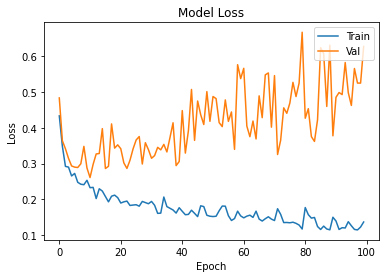

In [26]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

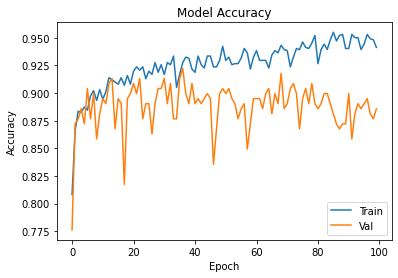

In [27]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [28]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])

In [29]:
model_3.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [30]:
hist_3 = model_3.fit(X_train, Y_train,
                     batch_size=32, epochs=100,
                     validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 54ms/step - loss: 14.2367 - accuracy: 0.6321 - val_loss: 3.9459 - val_accuracy: 0.6667
Epoch 2/100
32/32 [==============================] - 1s 47ms/step - loss: 1.6924 - accuracy: 0.8082 - val_loss: 0.6944 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 2s 59ms/step - loss: 0.5539 - accuracy: 0.8601 - val_loss: 0.5180 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 2s 66ms/step - loss: 0.5152 - accuracy: 0.8777 - val_loss: 0.5261 - val_accuracy: 0.8539
Epoch 5/100
32/32 [==============================] - 3s 84ms/step - loss: 0.4836 - accuracy: 0.8836 - val_loss: 0.4839 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 1s 46ms/step - loss: 0.4776 - accuracy: 0.8757 - val_loss: 0.4774 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 1s 41ms/step - loss: 0.5043 - accuracy: 0.8611 - val_loss: 0.5056 - val_accuracy: 0.8630
Epoch

32/32 [==============================] - 2s 53ms/step - loss: 0.4323 - accuracy: 0.8816 - val_loss: 0.4318 - val_accuracy: 0.8904
Epoch 59/100
32/32 [==============================] - 1s 47ms/step - loss: 0.4792 - accuracy: 0.8630 - val_loss: 0.4680 - val_accuracy: 0.8813
Epoch 60/100
32/32 [==============================] - 1s 34ms/step - loss: 0.4578 - accuracy: 0.8865 - val_loss: 0.4405 - val_accuracy: 0.8904
Epoch 61/100
32/32 [==============================] - 1s 33ms/step - loss: 0.4242 - accuracy: 0.8924 - val_loss: 0.4294 - val_accuracy: 0.8904
Epoch 62/100
32/32 [==============================] - 1s 34ms/step - loss: 0.4250 - accuracy: 0.8865 - val_loss: 0.4360 - val_accuracy: 0.8813
Epoch 63/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4467 - accuracy: 0.8796 - val_loss: 0.4349 - val_accuracy: 0.8950
Epoch 64/100
32/32 [==============================] - 2s 54ms/step - loss: 0.4406 - accuracy: 0.8777 - val_loss: 0.4323 - val_accuracy: 0.8995
Epoch 65/100

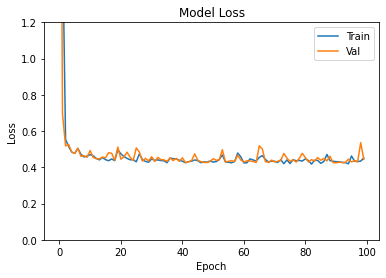

In [32]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

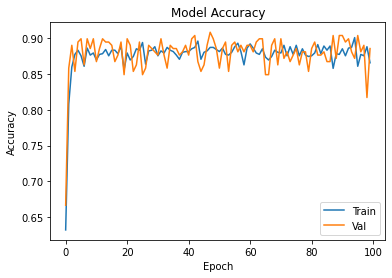

In [33]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()